# **CSCI 4980: Homework 3** <br>
## **Noah Hendrickson**

----------------------

## **Imports and Data Loading/Normalization**

In [319]:
import numpy as np
import pandas as pd
import torch, torchvision
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
data = pd.read_csv("data.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


split data and labels

In [321]:
y_df = data.iloc[:,-1].copy()
X_df = data.iloc[:,:-1].copy()

In [322]:
X_df_not_normal = X_df.copy()
X_df = (X_df - X_df.mean()) / X_df.std()

convert dataframe to tensor

In [323]:
X_tens = torch.tensor(X_df.values).float()
y_tens = torch.tensor(y_df.values).float()

X_tens_not_normal = torch.tensor(X_df_not_normal.values).float()

also convert dataframe to numpy

In [324]:
X_np = X_df.to_numpy()
y_np = y_df.to_numpy()

-------------------------

# **Problem 1: Visualizing Data**

## Part A: Histogram of Counts

[6, 5, 7, 8, 4, 3, 9]


<Axes: xlabel='quality', ylabel='count'>

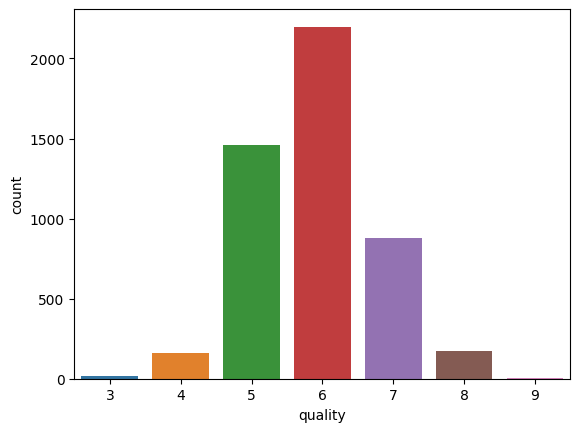

In [325]:
unique_vals = []
for i,val in enumerate(y_df):
    if (val not in unique_vals):
        unique_vals.append(val)
print(unique_vals)

sns.countplot(x=y_df)

## Part A: Answers:
The rating data is approximate normally distributed with the majority of <br>
the ratings being 6's. Ratings 5 and 7 are the next most common with 5 being <br>
slightly more common than 7. The ratings may follow this distribution because <br>
there are quite a few features of each wine that add up to produce the quality, <br>
and when that happens, the distribution of the result tends towards a normal. <br>
This distribution may result in a much higher likelihood of predicting 6's leading <br>
to more false negatives? I'm not exactly sure on that one.  

<br>

## Part B: Dense Histograms and Pair-Wise Joint Plot

<u>Alcohol kernel density estimate plot</u>

<Axes: xlabel='alcohol', ylabel='Density'>

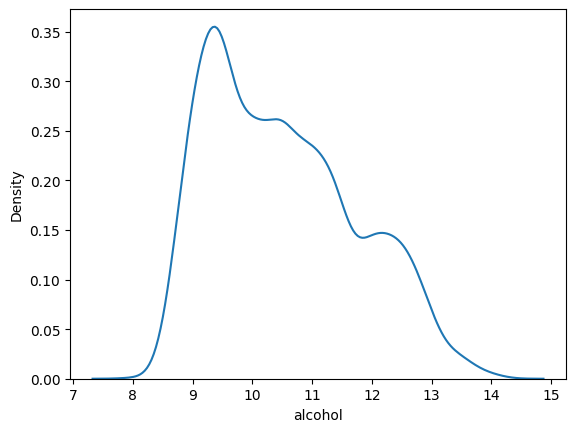

In [326]:
sns.kdeplot(data=data, x='alcohol')

<u>Density kernel density estimate plot</u>

<Axes: xlabel='density', ylabel='Density'>

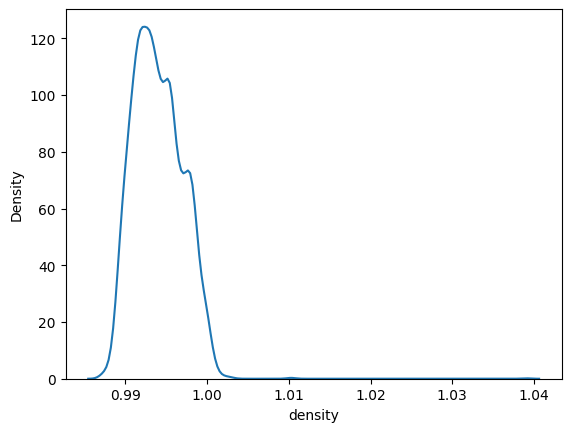

In [327]:
sns.kdeplot(data=data, x='density')

<u>Pair-Wise joint plot</u>

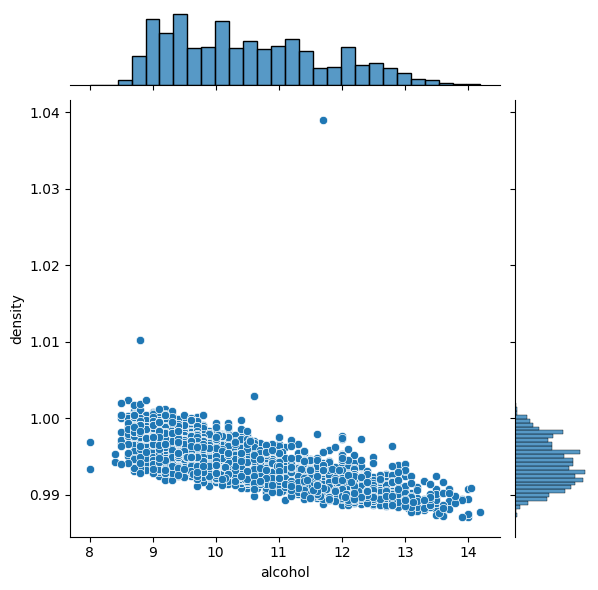

In [328]:
sns.jointplot(data=data, x="alcohol", y="density")

## Part B: Answers

The two distributions for the Kernel Density Estimate plots are roughly similar to each other <br>
but they are very much not normal distributions. They're more like a bumpy F distribution or perhaps <br>
a normal distribution skewed heavily to the left. As for the relations between the density <br>
and alcohol content shown in the pair-wise plot, we can clearly see that they are at least <br>
somewhat related. As the alcohol increases, the density seems to be going down. This makes <br>
sense because alcohol is less dense than water which means as the ratio between alcohol and <br>
water (or whatever other liquid is in as long as its more dense than alcohol) increases, <br>
the density of the liquid will decrease. 

<br>

## Part C: Pairwise Correlation and Heatmap

<Axes: >

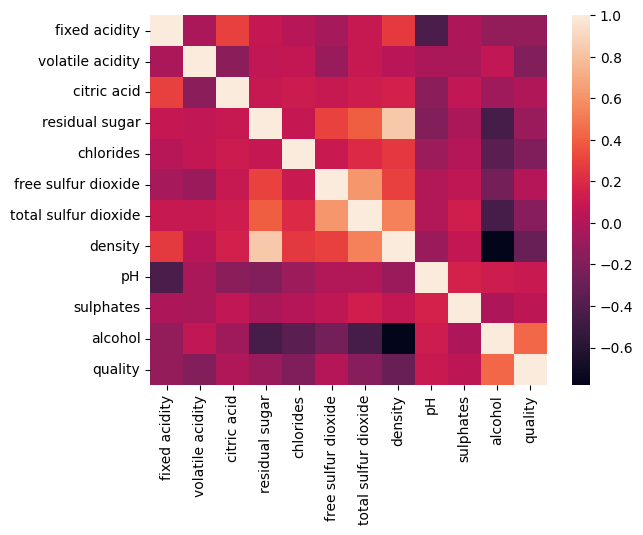

In [329]:
sns.heatmap(data.corr())

## Part C: Answers

One of the biggest correlations is between density and alcohol, which, as described <br>
in part B, makes complete sense. Outside of that, the relation between pH and fixed acidity <br>
is also quite highly negatively correlated which can be deduced, well, from the names. <br>
Residual sugar and alcohol are fairly negatively correlated as well as total sulfur dioxide <br>
and alcohol. Both of these make sense as there are quite a few alcohols that do not contain <br>
sulfides and alcohol likely contains less sugar than other things that might be with alcohol. <br>
As for positive correlations, sugar and density, free sulfur dioxide and total sulfur dioxide (duh), <br>
total sulfur dioxide and density, and alcohol and quality all tend to be fairly correlated. <br>
The last of which is pretty funny. 

<br>

---------------

# **Problem 2: Paramteric Modeling** 

## Part A: A Linear Model: Single Input

In [330]:
class LinearModel:
    def __init__(self, lr=0.01, epochs=500, print_rate=50):
        self.lr = lr
        self.epochs = epochs
        self.print_rate = print_rate
        self.params = 0.1*torch.randn(2).float()
        self.params.requires_grad = True

    def forward(self, X):
        return self.params[0]*X + self.params[1]

    # do gradient descent to tune params
    def train(self, X, y, criterion):
        for epoch in range(self.epochs):
            preds = self.forward(X)

            loss = criterion(preds, y)
            loss.backward()

            total_loss = loss.item()

            with torch.no_grad():
                self.params -= self.lr*self.params.grad
                self.params.grad.zero_() 

            if (epoch % self.print_rate == 0):
                print(f"[{epoch}] Loss: {total_loss}")

    def predict(self, X):
        return self.forward(X)
        

In [331]:
lm = LinearModel(
    lr=0.01,
    epochs=1000,
    print_rate=100
)

# also need to define the loss
# we can just use torch MSE

criterion = nn.MSELoss()

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


I want to first extract the alcohol to test against the quality.

In [332]:
# normalized
X = X_tens[:,-2].detach().clone()

# # this breaks
# # not normalized
# X = X_tens_not_normal[:, -1].detach().clone()

y = y_tens.detach().clone()

# test train split
# I didn't really want to make a dataloader

indices = np.random.permutation(X.shape[0])
train_indices = indices[:int(X.shape[0]*0.6)]
test_indices = indices[int(X.shape[0]*0.6):]

train_X = X[train_indices].detach().clone()
train_y = y[train_indices].detach().clone()

test_X = X[test_indices].detach().clone()
test_y = y[test_indices].detach().clone()

lm.train(train_X, train_y, criterion)

[0] Loss: 34.882530212402344
[100] Loss: 1.3907701969146729
[200] Loss: 0.8012495636940002
[300] Loss: 0.7908697724342346
[400] Loss: 0.7906869649887085
[500] Loss: 0.7906837463378906
[600] Loss: 0.7906837463378906
[700] Loss: 0.7906836271286011
[800] Loss: 0.7906837463378906
[900] Loss: 0.7906837463378906


In [333]:
preds = lm.predict(test_X)
print(preds)

err = 0
for i,pred in enumerate(preds):
    if (round(pred.item()) != test_y[i].item()): err += 1

print(err / test_y.shape[0])

tensor([5.8824, 5.8824, 5.8658,  ..., 5.8492, 5.9073, 5.9904],
       grad_fn=<AddBackward0>)
0.5586734693877551


## Part A: Answers

I chose the input to be the alcohol feature <br>
because that was the feature most strongly positively <br>
correlated on the heatmap with quality. I normalized the <br>
inputs by subtracting the mean and then dividing by the stddev <br>
because if I didn't it just kinda blew up. As for the equation used, <br>
it was as simple as y = mx + b where m and b are the parameters and x is in the input. <br>
y is the output. m and b were learned using gradient descent. <br>
As for a numerical analysis, the error rate of the prediction was found <br>
and the percent error was roughly 55.8%. This means that roughly 50% of the <br>
data points in the test set were predicted correctly. This isn't a great score, <br>
but using any of the other of the features gave worse scores so this is the one <br>
that I ended up sticking with. Violin plot is below. <br>

torch.Size([1960])
torch.Size([1960])


<Axes: >

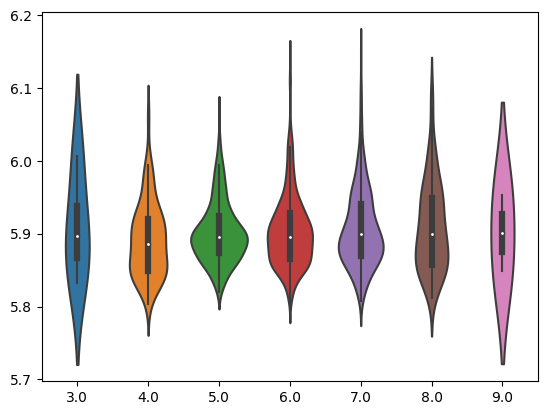

In [334]:
print(preds.shape)
print(test_y.shape)

sns.violinplot(x=test_y.detach().numpy(), y=preds.detach().numpy())

<br>

## Part B: A Multiple-Linear Model: At Least 3 Inputs

In [335]:
class MultipleLinearModel:
    def __init__(self, n_params=2, lr=0.01, epochs=500, print_rate=50):
        self.n_params = n_params
        self.lr = lr
        self.epochs = epochs
        self.print_rate = print_rate
        self.params = 0.1*torch.randn(n_params).float()
        self.params.requires_grad = True

    def forward(self, X):
        preds = torch.zeros(X.shape[0])
        for i in range(self.n_params-1):
            preds += self.params[i]*X[:,i]
        preds += self.params[-1]

        return preds

    # do gradient descent to tune params
    def train(self, X, y, criterion):
        for epoch in range(self.epochs):
            preds = self.forward(X)

            loss = criterion(preds, y)
            loss.backward()

            total_loss = loss.item()

            with torch.no_grad():
                self.params -= self.lr*self.params.grad
                self.params.grad.zero_() 

            if (epoch % self.print_rate == 0):
                print(f"[{epoch}] Loss: {total_loss}")

    def predict(self, X):
        return self.forward(X)

In [336]:
# use 5 most strongly correlated attributes
lm = MultipleLinearModel(
    n_params=5,
    lr=0.01,
    epochs=1000,
    print_rate=100
)

# also need to define the loss
# we can just use torch MSE

criterion = nn.MSELoss()

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [337]:
# normalized
X = X_tens[:,[3,5,6,9,10]].detach().clone()

# non-normalized
# X = X_tens_not_normal[:,[1,2,4,8,10]].detach().clone()

y = y_tens.detach().clone()

# test train split
# I didn't really want to make a dataloader

indices = np.random.permutation(X.shape[0])
train_indices = indices[:int(X.shape[0]*0.6)]
test_indices = indices[int(X.shape[0]*0.6):]

train_X = X[train_indices,:].detach().clone()
train_y = y[train_indices].detach().clone()

test_X = X[test_indices,:].detach().clone()
test_y = y[test_indices].detach().clone()

lm.train(train_X, train_y, criterion)

[0] Loss: 35.342247009277344
[100] Loss: 1.3386136293411255
[200] Loss: 0.735571026802063
[300] Loss: 0.7247225642204285
[400] Loss: 0.7245205640792847
[500] Loss: 0.7245159149169922
[600] Loss: 0.7245155572891235
[700] Loss: 0.7245155572891235
[800] Loss: 0.7245156168937683
[900] Loss: 0.7245155572891235


In [338]:
preds = lm.predict(test_X)

print(lm.params)

err = 0
for i,pred in enumerate(preds):
    if (round(pred.item()) != test_y[i].item()): err += 1

print(err / test_y.shape[0])

tensor([-0.0513,  0.1623, -0.2561,  0.0710,  5.8860], requires_grad=True)
0.55


## Part B: Answers

For the input features, I decided to try a few different things. <br>
Through my testing, I found that almost none of the features besides <br>
alcohol contributed to the final result. This would make sense because <br>
on the heatplot made in question one, none of the other features were <br>
really positively correlated with the quality besides alcohol content. <br>
All the data was normalized again because of exploding without it. <br>
The equation used to find the output was y = a1x1 + a2x2 + ... + anxn + b <br>
where a1..an and b were the parameters and x1..xn were the input feature columns. <br>
The result of this multi-linear model was pretty much the same as the linear model, <br>
which can be assumed when looking at how the other features besides alcohol <br>
content contibute to the final. Almost all of the features contributed close to zero, <br>
a lot even negatively, so the final percent error of 55% ended up pretty much the same <br>
as the linear model. The violin plot can be seen below. The thing to note about the <br>
violin plot is that, even though the error rate was relatively similar, the spread of <br>
the values was much higher than the linear model, showing that those other features <br>
were affecting it somewhat. 

torch.Size([1960])
torch.Size([1960])


<Axes: >

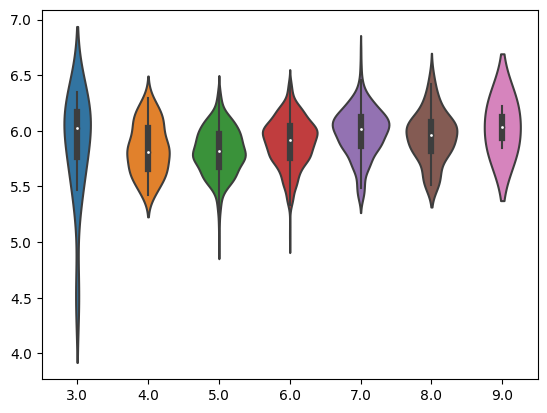

In [339]:
print(preds.shape)
print(test_y.shape)

sns.violinplot(x=test_y.detach().numpy(), y=preds.detach().numpy())

<br>

## Part C: A Non-Linear Model: Variable Interaction / Nonlinear Terms

## Part C: Answers